### Name : Khushboo Chaudhari
#### Problem Statement : Predict the percentage of students based on no. of study hours. 


### We are going to use linear regression to predict the percentage of students based on no. of study hours

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#check if there are null values in dataset
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### No Null Values in our data so now we can visualize our data

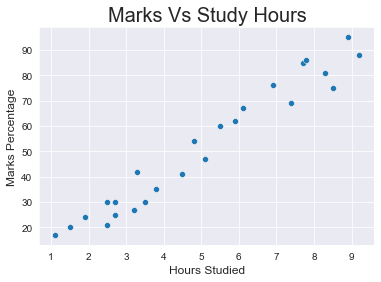

In [13]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

##### From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

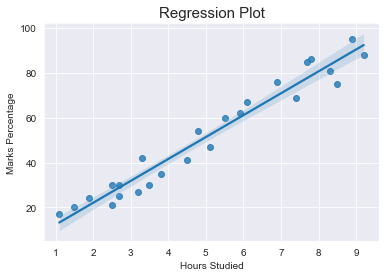

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=15)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

### Training Model

#### Spliting data

In [17]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Fitting the data into model

In [19]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


### Predicting the percentage of marks

In [20]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing the Predicted Marks with the Actual Marks

In [21]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually Comparing the Predicted Marks with the Actual Marks

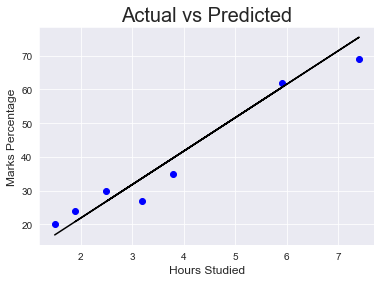

In [23]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the Model

In [24]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


##### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [25]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.